In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import requests
from bs4 import BeautifulSoup as bs
from random import randint
from random import *
from time import sleep 
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv("Ordered_Data_Etherscan_scrapping.csv")
del df['Unnamed: 0']
df


,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
0,0x086a2a060cbfbf47f9dfbdbbd113b210c8820ab14250...,Withdraw ETH,15134004,23 mins ago,0x357dfdc34f93388059d2eb09996d80f233037cba,IN,Aave: WETH Gateway,0.000000,Ether,0.014109
1,0x0c4e0adf392af5e73a1bdb410c48174e9c8eafdbf9f5...,Withdraw ETH,15133919,43 mins ago,0x4bdfd3ce7bfb07b75a2a59a8f723910dd7147b9c,IN,Aave: WETH Gateway,0.000000,Ether,0.005413
2,0xbbacf41817a593363b6d1994c5ecf6e59aed46c16faa...,Withdraw ETH,15133792,1 hr 14 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,0.000000,Ether,0.006093
3,0x5b2a24cf74ef6dbc0e11818517ed5c0948541c6c2d55...,Repay ETH,15133709,1 hr 31 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,28.091154,Ether,0.004664
4,0x775c498801d9fa398cfdded853bedcd4bb6b84f42d5a...,Withdraw ETH,15133694,1 hr 33 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,0.000000,Ether,0.004882
...,...,...,...,...,...,...,...,...,...,...
99595,0xf97cc92f9861b304fde5c63fe186926a05dedb56ffe5...,Repay ETH,12293852,446 days 9 hrs ago,0x2de640a18fe3480aa802aca91f70177ada103391,IN,Aave: WETH Gateway,500.000000,Ether,0.059676
99596,0x5c84d48105c8fa51173370231089cd8a2555393654c8...,Deposit ETH,12293840,446 days 9 hrs ago,0xd7c4b21657288253b17071b391f98d03c98a1553,IN,Aave: WETH Gateway,1.000000,Ether,0.051519
99597,0xaddd5ef3dea20fbdcb781130b07d9d00333502681e74...,Withdraw ETH,12293827,446 days 9 hrs ago,0xdc5ff02e8cbe7405c465adba6f2d036d6be28001,IN,Aave: WETH Gateway,0.000000,Ether,0.012744
99598,0xfbb2c16b87153486826e1bdbc779a8a8aeef04462e95...,Deposit ETH,12293818,446 days 9 hrs ago,playingmoney.eth,IN,Aave: WETH Gateway,10.000000,Ether,0.049405


In [10]:
df.max()

Txn_Hash       0xfffe87cae5f9d389f4bf73a1f1f2cdf8295c9776e2e0...
Method                                              Withdraw ETH
Block                                                   15134004
Date                                           99 days 9 hrs ago
From                                               zztkblock.eth
IN/OUT                                                        IN
Destination                                   Aave: WETH Gateway
Value                                                   400000.0
Crypto                                                       wei
TXN_Fee                                                  50.0697
dtype: object

In [11]:
df[df.TXN_Fee == 50.0697]

,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
1796,0x9fc2a79ad37e9162184bffe477d805ed9f027802fe21...,Withdraw ETH,15054434,12 days 7 hrs ago,Fund: 0x712...996,IN,Aave: WETH Gateway,0.0,Ether,50.0697


In [38]:
df = df.drop(1796) 

J'enlève la ligne ou le Fee= 50 car il est trop grand par rapport aux autres et ca rend les graphiques illisibles.

In [42]:
df.max()

Txn_Hash       0xfffe87cae5f9d389f4bf73a1f1f2cdf8295c9776e2e0...
Method                                              Withdraw ETH
Block                                                   15134004
Date                                           99 days 9 hrs ago
From                                               zztkblock.eth
IN/OUT                                                        IN
Destination                                   Aave: WETH Gateway
Value                                                   400000.0
Crypto                                                       wei
TXN_Fee                                                 1.172423
dtype: object

In [43]:
df.Value.max()

400000.0

<AxesSubplot:xlabel='Value', ylabel='TXN_Fee'>

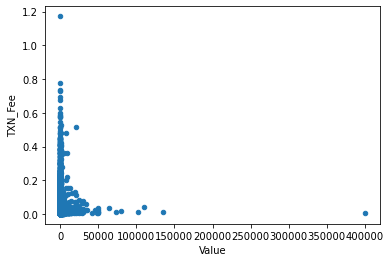

In [55]:
df.plot.scatter(x='Value',y="TXN_Fee")

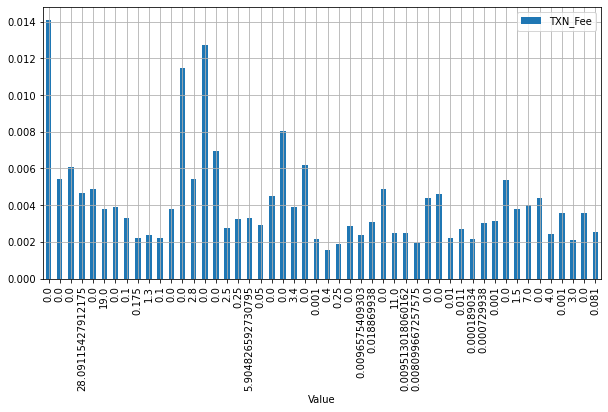

In [44]:
df.head(50).plot.bar(y='TXN_Fee',x='Value', grid=True, figsize=(10, 5));

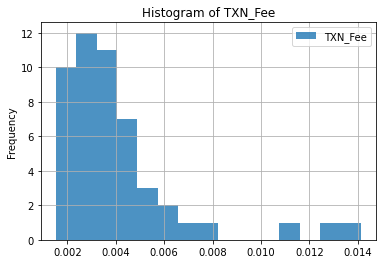

In [45]:
df.head(50).plot.hist(y='TXN_Fee', bins = 15, title='Histogram of TXN_Fee', alpha=0.8, grid=True);

In [46]:
df.head(5).Value


0     0.000000
1     0.000000
2     0.000000
3    28.091154
4     0.000000
Name: Value, dtype: float64

# Etude des données:

- Type d'opérations:

In [47]:
df['Method'].value_counts()

Deposit ETH            55771
Withdraw ETH           28325
Borrow ETH              9470
Repay ETH               5967
Transfer                  64
Approve                    1
Transfer Ownersh...        1
Name: Method, dtype: int64

- Nombre d'opération par Adresse:

In [48]:
df['From'].value_counts()[:100]

0x208b82b04449cd51803fae4b1561450ba13d9510    1225
anonymoux.eth                                  719
0x98578d10dc7fc755ea00682bd4e931b798219892     420
0xd755578cb8b9e369803fe08b7d875287914a3d3c     415
0xc803698a4be31f0b9035b6eba17623698f3e2f82     397
                                              ... 
0x49e4699c2a0c849033e877da7204cf6fd63555dc      72
0x3ee505ba316879d246a8fd2b3d7ee63b51b44fab      72
0x94cf4a1568d59425183ca9c5613ef8620ca59286      72
0xf368d43f148e1803ec793670183b0ca6a07d3898      70
0x6bf9dd0b9f1575a98ed987dccbaa51bf8aef0aef      70
Name: From, Length: 100, dtype: int64

- Les Opération Withdraw ont toutes une Value de 0.0 ETH Sauf une qui est à 0.001 ETH

In [49]:
df_Withdraw=df[df.Method == "Withdraw ETH"]
df_Withdraw.head(5)

,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
0,0x086a2a060cbfbf47f9dfbdbbd113b210c8820ab14250...,Withdraw ETH,15134004,23 mins ago,0x357dfdc34f93388059d2eb09996d80f233037cba,IN,Aave: WETH Gateway,0.0,Ether,0.014109
1,0x0c4e0adf392af5e73a1bdb410c48174e9c8eafdbf9f5...,Withdraw ETH,15133919,43 mins ago,0x4bdfd3ce7bfb07b75a2a59a8f723910dd7147b9c,IN,Aave: WETH Gateway,0.0,Ether,0.005413
2,0xbbacf41817a593363b6d1994c5ecf6e59aed46c16faa...,Withdraw ETH,15133792,1 hr 14 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,0.0,Ether,0.006093
4,0x775c498801d9fa398cfdded853bedcd4bb6b84f42d5a...,Withdraw ETH,15133694,1 hr 33 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,0.0,Ether,0.004882
6,0xc9b9f126346f17d01ef0cffe699f1828622170746e7e...,Withdraw ETH,15133615,1 hr 52 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,0.0,Ether,0.003906


In [50]:
df_Withdraw[df_Withdraw.Value == df_Withdraw.Value.max()]

,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
58660,0xfbbace1c208f0d7472eaf955f710e9cb13efdd2c03bd...,Withdraw ETH,13016161,334 days 2 hrs ago,0x0632b2b918e941140bae0500326eb232cb70dc18,IN,Aave: WETH Gateway,0.001,Ether,0.000599


- DataFrame des déposit:

In [51]:
df_Deposit=df[df.Method == "Deposit ETH"]
df_Deposit.head(5)

,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
7,0x04a542357d7ea456bf9dec657d4808921a89dcd513ff...,Deposit ETH,15133599,1 hr 55 mins ago,0xf178b1f6ef1c52597418d842cd155a6892e3e4cc,IN,Aave: WETH Gateway,0.100,Ether,0.003283
8,0x313e7e3ecb460869825b56f3044bebc75b3866b550ac...,Deposit ETH,15133504,2 hrs 18 mins ago,0x74394656b46c87c81d24675825d1d10f0b84a6a6,IN,Aave: WETH Gateway,0.175,Ether,0.002210
9,0xe17badb4a9c91d0a090e1080487d1852290bf0c8cef1...,Deposit ETH,15133500,2 hrs 19 mins ago,0xb32f88b89365d428751aa060ab1f983d012ac423,IN,Aave: WETH Gateway,1.300,Ether,0.002398
10,0x2b11b11746e60085595377ea3be845162f6bc9b0c822...,Deposit ETH,15133474,2 hrs 25 mins ago,0x74394656b46c87c81d24675825d1d10f0b84a6a6,IN,Aave: WETH Gateway,0.100,Ether,0.002220
13,0x3882605706ea5462ca894d42a70354ddf1d941a98334...,Deposit ETH,15133321,3 hrs 1 min ago,0xfbebc529367266038a1e8be0a0bb7069e792e80d,IN,Aave: WETH Gateway,2.800,Ether,0.005416


In [122]:
df_Deposit.reset_index(inplace=True, drop=True)
df_Deposit.to_csv("DataFrame_Deposit.csv")

<AxesSubplot:xlabel='Value', ylabel='TXN_Fee'>

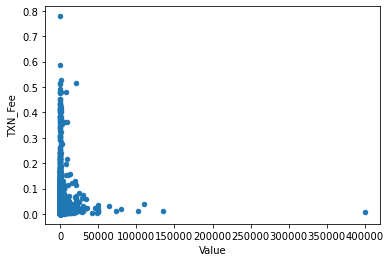

In [123]:
df_Deposit.plot.scatter(x='Value',y="TXN_Fee")

In [162]:
L=[] # Liste des adress qui ont fait les déposits (avec doublons)
for i in range(55771):
    L.append(df_Deposit.From[i])
#print(L)

In [163]:
mylist2 = set(L)     #mylist2 est la liste des adress qui ont fait des deposits (sans doublons)
mylist2 = list(mylist2)
print(len(mylist2))


17901


In [164]:
print(len(L))

55771


- construction d'un dataframe

In [165]:
nombre_occurence_adresse=[]
for i in mylist2:
    a=L.count(i)
    nombre_occurence_adresse.append(a)
print(len(nombre_occurence_adresse))

17901


In [166]:
Valeur=[]
for i in mylist2:
    c=0
    for j in range(55771):
        if L[j]==i:
            c=c+df_Deposit.Value[j]
    Valeur.append(c)
print(len(Valeur))

17901


In [167]:

data = {'Adresse':mylist2,'Nombre_occurences':nombre_occurence_adresse,'Valeur_Deposit_totale' :Valeur}
df_adrr_val=pd.DataFrame(data)

In [168]:
df_adrr_val

,Adresse,Nombre_occurences,Valeur_Deposit_totale
0,0x0adf1fbcae6b16d96d30685d2e0d92dab8639d3a,1,0.250000
1,0x2db6f5e838ed2bad993e9ff2d3d7a5c1cc35704c,3,73.065401
2,0xb9f92e050e54e00ae43531e5502a377cc65c7ceb,1,0.000010
3,0x25bebf37aaeda610dde45afcdb23c99bcc9b95b3,1,0.020000
4,thecrypt.eth,1,0.175290
...,...,...,...
17896,0x219cbdcad9ee74f696ea066d3027a3372e8c9bc1,1,0.010501
17897,0x8454b825b2d4ea2b0e2f6e2cfbc4d4d24f145699,2,51.000000
17898,0x63a70edd511e7b160441f8203fa9f0c83047c4fd,2,1.130553
17899,0xac3ca12d6a07ea7252515c72b895be1718b8df02,1,2.000000


In [169]:
df_adrr_val.to_csv("DataFrame_Deposit_per_Adress.csv")

- DataFrame des Borrow:

In [138]:
df_Borrow=df[df.Method == "Borrow ETH"]
df_Borrow.reset_index(inplace=True, drop=True)
df_Borrow.to_csv("DataFrame_Borrow.csv")

In [139]:
df_Borrow.head(5)

,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
0,0x0ee3d74556bad0c2a38bab8618c5b89757eb81fa8e8f...,Borrow ETH,15133387,2 hrs 45 mins ago,0x1109297e392d92c1613fdbdf30579a0215c20da9,IN,Aave: WETH Gateway,0.0,Ether,0.011497
1,0x6451b375f70348703904be068ebbdeaa994d0bf2b3ab...,Borrow ETH,15132927,4 hrs 28 mins ago,0x31d6e97282e76450f04e91c13bfc47f1fb27b0b6,IN,Aave: WETH Gateway,0.0,Ether,0.008015
2,0xf3fe2bad049d72d0a519859f547ddb24b43b087345db...,Borrow ETH,15132688,5 hrs 24 mins ago,0x858256cc555b4ab1a2220abda500859a62211579,IN,Aave: WETH Gateway,0.0,Ether,0.002880
3,0x25ff9de5cb73aebe6a7367b88cb0b170ac7cfb774673...,Borrow ETH,15132679,5 hrs 25 mins ago,0x2834815a451562e1d469e1e38fc728d57e2879ee,IN,Aave: WETH Gateway,0.0,Ether,0.004881
4,0xb0401cc054fe24710d7eac73f5a7c9185781ade6cbe6...,Borrow ETH,15132643,5 hrs 32 mins ago,onlychans.eth,IN,Aave: WETH Gateway,0.0,Ether,0.004413


In [127]:
df_Borrow.Value.max()

0.0

Les Borrow ont tous une valeur de 0 ETH (étrange)

- DataFrame des Repay:

In [134]:
df_Repay=df[df.Method=="Repay ETH"]
df_Repay.reset_index(inplace=True, drop=True)
df_Repay.to_csv("DataFrame_Repay.csv")

In [140]:
df_Repay

,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
0,0x5b2a24cf74ef6dbc0e11818517ed5c0948541c6c2d55...,Repay ETH,15133709,1 hr 31 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,28.091154,Ether,0.004664
1,0x3f89e2870113c6d94779b9b7cdb75a3c3a139cae694b...,Repay ETH,15133622,1 hr 49 mins ago,0xcd64bb95ee1b3a95586836d636849b71b871732b,IN,Aave: WETH Gateway,19.000000,Ether,0.003769
2,0x1839d047ec768283c6a649af3d9c6e085f91f97fe108...,Repay ETH,15132028,7 hrs 46 mins ago,0x87d3ee8cc75c3916e3b6f56e307aadcd3afeff68,IN,Aave: WETH Gateway,300.000000,Ether,0.004391
3,0x0299fac3318ac9c9644784f307f8870a32edc4b53b08...,Repay ETH,15130281,14 hrs 25 mins ago,0xbfa6190743b1179e674508585de4552af3d87d02,IN,Aave: WETH Gateway,0.700000,Ether,0.007327
4,0x392ddfb8d8d8f3137b7dd6386fdff4b4e014b3a71f1d...,Repay ETH,15130110,14 hrs 59 mins ago,0x8a07fa8afa2c54bc47da559a0ab4bc15b43bc897,IN,Aave: WETH Gateway,25.460000,Ether,0.012598
...,...,...,...,...,...,...,...,...,...,...
5962,0x65cecfa422a27f9ad5b76db6b0fc915b57badede2e2f...,Repay ETH,12295160,446 days 4 hrs ago,0xd34f3e85bb7c8020c7959b80a4b87a369d639dc0,IN,Aave: WETH Gateway,416.033472,Ether,0.027908
5963,0xce8175337358dfff5e5bed1d1a72b1b78aa89b03f2d2...,Repay ETH,12294302,446 days 7 hrs ago,0xbb4567bef67153e5a4d4bd1a8c6aae5234b34e2b,IN,Aave: WETH Gateway,3.242836,Ether,0.024724
5964,0xf360aaf2ee702d4cdbff40f457ce0481dc200bba3d5f...,Repay ETH,12294257,446 days 7 hrs ago,0xbb4567bef67153e5a4d4bd1a8c6aae5234b34e2b,IN,Aave: WETH Gateway,3.000000,Ether,0.032357
5965,0xda85dfd5a91b30479e0096f73de1eb93895429d5096f...,Repay ETH,12294054,446 days 8 hrs ago,0xb8fc6fd16ab5f3b6652c6580c8b6208ddbd8b8a5,IN,Aave: WETH Gateway,42.113603,Ether,0.050337


<AxesSubplot:xlabel='Value', ylabel='TXN_Fee'>

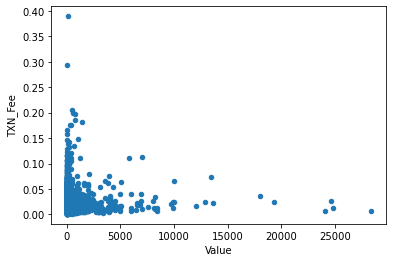

In [58]:
df_Repay.plot.scatter(x='Value',y="TXN_Fee")

In [141]:
L=[] # Liste des adress qui ont fait les Repay (avec doublons)
for i in range(5967):
    L.append(df_Repay.From[i])
print(len(L))

5967


In [142]:
mylist2 = set(L)     #mylist2 est la liste des adress qui ont fait des Repay (sans doublons)
mylist2 = list(mylist2)
print(len(mylist2))

2310


In [143]:
nombre_occurence_adresse=[]
for i in mylist2:
    a=L.count(i)
    nombre_occurence_adresse.append(a)
print(len(nombre_occurence_adresse))

2310


In [145]:
Valeur=[]
for i in mylist2:
    c=0
    for j in range(5967):
        if L[j]==i:
            c=c+df_Repay.Value[j]
    Valeur.append(c)
print(len(Valeur))

2310


In [146]:
data = {'Adresse':mylist2,'Nombre_occurences':nombre_occurence_adresse,'Valeur_Repay_totale' :Valeur}
df_adrr_val=pd.DataFrame(data)

In [148]:
df_adrr_val

,Adresse,Nombre_occurences,Valeur_Repay_totale
0,cybervault.eth,4,295.464747
1,0x0adf1fbcae6b16d96d30685d2e0d92dab8639d3a,1,0.432675
2,0x6a8660031f6bb191cac9e6c941fa591bc174c094,1,0.200000
3,0xa7f3c74f0255796fd5d3ddcf88db769f7a6bf46a,2,100.325239
4,0x083c5d8fb28ca1d49a4f0b7189556cf962a04ff0,1,320.003000
...,...,...,...
2305,0x1f02f8f9c2d0430d9f0475bc7ebfbbcc6c84dd75,1,25.070970
2306,0xbc8be3392b13922008804d31dc5093ff1a4d2e7f,1,1.002891
2307,0x7e55a3ebf437c943ad6ca86676c20714810e1fe3,1,0.158796
2308,0x299f03170913b4fd3158100dd5e5cc97fd0b0967,3,2.704992


In [149]:
df_adrr_val.to_csv("DataFrame_Repay_per_Adress.csv")

- DataFrame des Transferts:

In [136]:
df_Transfert=df[df.Method=="Transfer"]
df_Transfert.reset_index(inplace=True, drop=True)
df_Transfert.to_csv("DataFrame_Transfert.csv")

In [150]:
df_Transfert

,Txn_Hash,Method,Block,Date,From,IN/OUT,Destination,Value,Crypto,TXN_Fee
0,0xc4d61086924b6a5cd140c8a670e982be3687b4b1aedb...,Transfer,15025728,17 days 14 hrs ago,0x3a4406e17619501d1a61d5fb4b597b3b504e7ab6,IN,Aave: WETH Gateway,0.012910,Ether,0.000500
1,0xa664aafdea6529582a966db556baacd03a4e8bd3016a...,Transfer,15012550,20 days 1 hr ago,0x1950dabc57a04b4c831e64600b91c8ab34973c8a,IN,Aave: WETH Gateway,0.146113,Ether,0.000337
2,0x6663baefe9c8f33add617916447ecc4a39b432b465da...,Transfer,14962420,28 days 20 hrs ago,0x1950dabc57a04b4c831e64600b91c8ab34973c8a,IN,Aave: WETH Gateway,0.140000,Ether,0.001379
3,0xcdb83f472df815df9a695fbe0a02875b1c425bda06c5...,Transfer,14962236,28 days 21 hrs ago,0x1950dabc57a04b4c831e64600b91c8ab34973c8a,IN,Aave: WETH Gateway,0.147472,Ether,0.001435
4,0xcecdbaeb5377e9eb9f6e5b4df3cb08874e5fe6f2b5fc...,Transfer,14961496,29 days 22 mins ago,0x1950dabc57a04b4c831e64600b91c8ab34973c8a,IN,Aave: WETH Gateway,0.149236,Ether,0.000739
...,...,...,...,...,...,...,...,...,...,...
59,0xc39ce128a7afe81f4e210eb76589632d07d34ed2ff71...,Transfer,12465198,419 days 22 hrs ago,0xea49224beb66c3d3f8f0552ec2cb6dc94ebe8175,IN,Aave: WETH Gateway,0.000000,Ether,0.021000
60,0x33c9a9b2415d9ca874f564862cd067ec5189db9084eb...,Transfer,12465198,419 days 22 hrs ago,0xea49224beb66c3d3f8f0552ec2cb6dc94ebe8175,IN,Aave: WETH Gateway,0.000000,Ether,0.015750
61,0x50607e7d13a023f0b67d3fbdfc4494bed2ee89fcf475...,Transfer,12389571,431 days 14 hrs ago,0x2d3a09dc5bb55e9888e7eef5583b3e23eb704113,IN,Aave: WETH Gateway,0.000000,Ether,0.001407
62,0x269bd25fc9bf5ddc33073b514e917a7a758c43b40b9a...,Transfer,12337326,439 days 16 hrs ago,cryptobunker.eth,IN,Aave: WETH Gateway,0.000000,Ether,0.018900


<AxesSubplot:xlabel='Value', ylabel='TXN_Fee'>

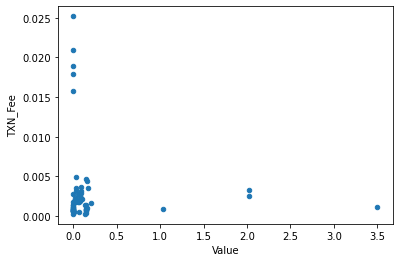

In [59]:
df_Transfert.plot.scatter(x='Value',y="TXN_Fee")

In [151]:
L=[] # Liste des adress qui ont fait des Transferts (avec doublons)
for i in range(64):
    L.append(df_Deposit.From[i])
#print(L)

In [152]:
mylist2 = set(L)     #mylist2 est la liste des adress qui ont fait des transferts (sans doublons)
mylist2 = list(mylist2)
print(len(mylist2))

46


In [153]:
print(len(L))

64


In [154]:
nombre_occurence_adresse=[]
for i in mylist2:
    a=L.count(i)
    nombre_occurence_adresse.append(a)
print(len(nombre_occurence_adresse))

46


In [157]:
Valeur=[]
for i in mylist2:
    c=0
    for j in range(64):
        if L[j]==i:
            c=c+df_Transfert.Value[j]
    Valeur.append(c)
print(len(Valeur))

46


In [158]:
data = {'Adresse':mylist2,'Nombre_occurences':nombre_occurence_adresse,'Valeur_Transfert_totale' :Valeur}
df_adrr_val=pd.DataFrame(data)

In [160]:
df_adrr_val.head(5)

,Adresse,Nombre_occurences,Valeur_Transfert_totale
0,0xc42060f4d259bc388f6878564afef8f27ed11bbf,1,0.079369
1,0x648b826f860c7d41979d9f8fd78b7c45d5d6bf72,4,0.308031
2,0x615210ce1e958ac404e0219f86e26ff1631e492b,5,0.000000
3,0x74394656b46c87c81d24675825d1d10f0b84a6a6,5,0.457727
4,0xc3907286b0540863f8a9c5f1c2324bc6f06c5751,1,0.151000


In [161]:
df_adrr_val.to_csv("DataFrame_Transfert_per_Adress.csv")